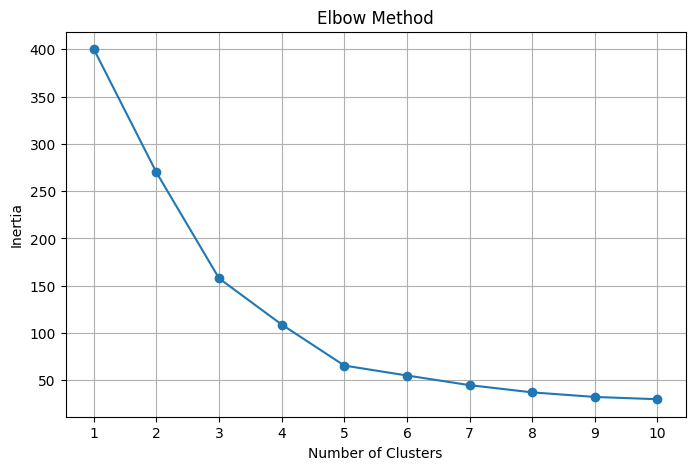

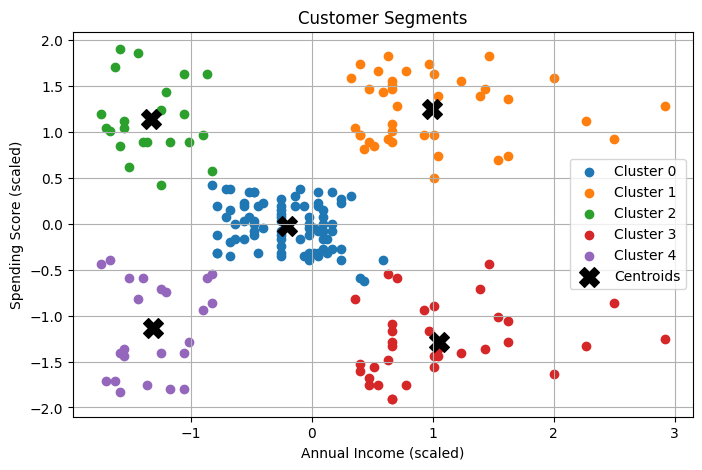

Silhouette Score: 0.555


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_csv('/content/Mall_Customers.csv')

# Select relevant features
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method to find optimal number of clusters
inertia_values = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Plot Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Choose optimal k
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to original data
data['Cluster'] = cluster_labels

# Visualize clusters
plt.figure(figsize=(8, 5))
for cluster in range(optimal_k):
    plt.scatter(
        X_scaled[cluster_labels == cluster, 0],
        X_scaled[cluster_labels == cluster, 1],
        label=f'Cluster {cluster}'
    )

plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=200, c='black', marker='X', label='Centroids'
)

plt.title('Customer Segments')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate clustering using Silhouette Score
score = silhouette_score(X_scaled, cluster_labels)
print(f'Silhouette Score: {score:.3f}')
